In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from featexp import *

In [2]:
notebook_path = os.path.abspath("article.ipynb")
data_folder = "/home-credit-default-risk/"
train_data_file = "application_train.csv"
test_data_file = "application_test.csv"

In [3]:
# Functions for data preprocessing.
def get_nonull_dummy_data(application_train_raw, dummy_drop=["ORGANIZATION_TYPE"]):
    # Idenifying float cols with less nulls and imputing with mean.
    nulls = pd.isnull(application_train_raw).sum()
    less_nulls = nulls[(nulls < 3075) & (nulls != 0)].index
    less_nulls_float = []
    for i in range(len(less_nulls)):
        if application_train_raw[less_nulls[i]].dtype != "O":
            less_nulls_float.append(less_nulls[i])

    application_train_raw[less_nulls_float] = application_train_raw[
                                                less_nulls_float].fillna(application_train_raw[less_nulls_float].mean())

    # Idenifying float cols with high nulls and creating null_flag column and imputing with min-10.
    more_nulls = nulls[(nulls >= 3075)].index
    more_nulls_float = []
    for i in range(len(more_nulls)):
        if application_train_raw[more_nulls[i]].dtype != "O":
            more_nulls_float.append(more_nulls[i])

    application_train_raw[more_nulls_float] = application_train_raw[
                                                more_nulls_float].fillna(application_train_raw[more_nulls_float].min() - 100)

    # Droping some columns.
    for col in dummy_drop:
        if col in application_train_raw:
            application_train_raw.drop(columns=col, axis=1, inplace=True)

    # Getting categorial columns
    all_cols = application_train_raw.columns
    cat_cols = []
    for col in all_cols:
        if application_train_raw[col].dtype == "O":
            cat_cols.append(col)

    # From categorial columns to float
    application_train_raw = pd.get_dummies(application_train_raw, columns=cat_cols, dummy_na=True)
    
    drop = ['CODE_GENDER_XNA', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown']
    for col in drop:
        if col in application_train_raw:
            application_train_raw.drop(columns=col, axis=1, inplace=True)

    return application_train_raw

In [4]:
def import_and_create_train_test_data(train_data_file, test_size=0.33, random_state=42):
    application = get_nonull_dummy_data(pd.read_csv(train_data_file), dummy_drop=["ORGANIZATION_TYPE", 'SK_ID_CURR'])

    X = application.drop(["TARGET"], axis=1)
    y = application["TARGET"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return (X_train, X_test, y_train, y_test)

In [5]:
def import_and_create_TEST_data(test_data_file):
    application = get_nonull_dummy_data(pd.read_csv(test_data_file), dummy_drop=["ORGANIZATION_TYPE"])
    users = application[["SK_ID_CURR"]]
    users.reset_index(drop=True, inplace=True)
    return application, users

In [6]:
X_train, X_test, y_train, y_test = import_and_create_train_test_data(os.path.dirname(notebook_path) +                                                                                                          data_folder + train_data_file)
X_TEST, TEST_users = import_and_create_TEST_data(os.path.dirname(notebook_path) + data_folder + test_data_file)

In [7]:
data_train = X_train.reset_index(drop=True)
data_train['target'] = y_train.reset_index(drop=True)
data_test = X_test.reset_index(drop=True)
data_test['target'] = y_test.reset_index(drop=True)

In [8]:
data_train = X_train.reset_index(drop=True)
data_train['target'] = y_train.reset_index(drop=True)
data_test = X_test.reset_index(drop=True)
data_test['target'] = y_test.reset_index(drop=True)

In [9]:
for i in range(len(data_train.columns)):
    print(i, " ", data_train.columns[i])

0   CNT_CHILDREN
1   AMT_INCOME_TOTAL
2   AMT_CREDIT
3   AMT_ANNUITY
4   AMT_GOODS_PRICE
5   REGION_POPULATION_RELATIVE
6   DAYS_BIRTH
7   DAYS_EMPLOYED
8   DAYS_REGISTRATION
9   DAYS_ID_PUBLISH
10   OWN_CAR_AGE
11   FLAG_MOBIL
12   FLAG_EMP_PHONE
13   FLAG_WORK_PHONE
14   FLAG_CONT_MOBILE
15   FLAG_PHONE
16   FLAG_EMAIL
17   CNT_FAM_MEMBERS
18   REGION_RATING_CLIENT
19   REGION_RATING_CLIENT_W_CITY
20   HOUR_APPR_PROCESS_START
21   REG_REGION_NOT_LIVE_REGION
22   REG_REGION_NOT_WORK_REGION
23   LIVE_REGION_NOT_WORK_REGION
24   REG_CITY_NOT_LIVE_CITY
25   REG_CITY_NOT_WORK_CITY
26   LIVE_CITY_NOT_WORK_CITY
27   EXT_SOURCE_1
28   EXT_SOURCE_2
29   EXT_SOURCE_3
30   APARTMENTS_AVG
31   BASEMENTAREA_AVG
32   YEARS_BEGINEXPLUATATION_AVG
33   YEARS_BUILD_AVG
34   COMMONAREA_AVG
35   ELEVATORS_AVG
36   ENTRANCES_AVG
37   FLOORSMAX_AVG
38   FLOORSMIN_AVG
39   LANDAREA_AVG
40   LIVINGAPARTMENTS_AVG
41   LIVINGAREA_AVG
42   NONLIVINGAPARTMENTS_AVG
43   NONLIVINGAREA_AVG
44   APARTMENTS_MODE
45 

                                         Plots for DAYS_BIRTH                                         


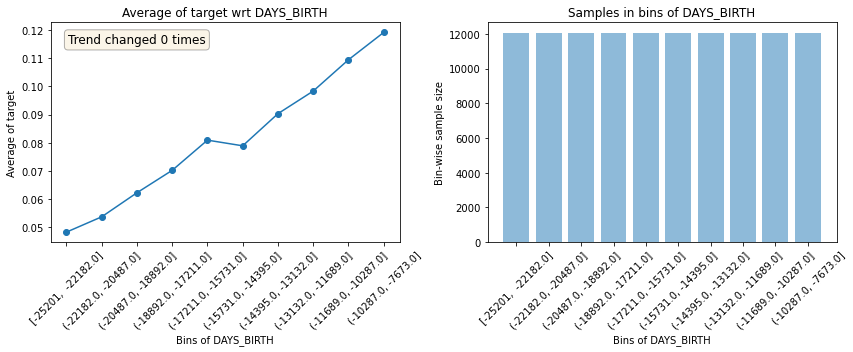

--------------------------------------------------------------------------------------------------------------




In [10]:
get_univariate_plots(data=data_train, target_col='target', features_list=["DAYS_BIRTH"])

                                    Plots for LIVINGAPARTMENTS_AVG                                    
                                           Train data plots                                           


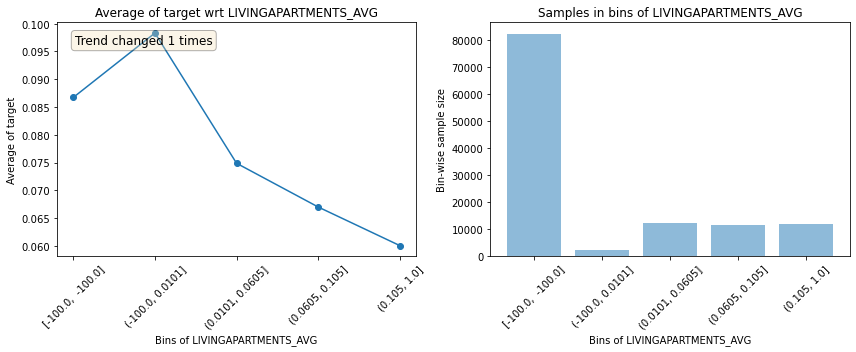

                                           Test data plots                                            


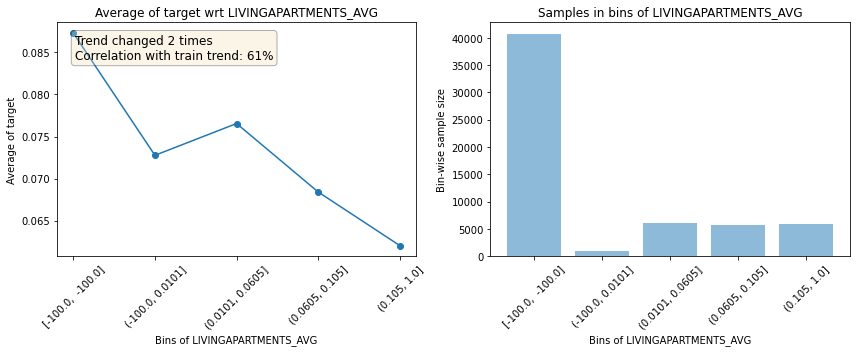

--------------------------------------------------------------------------------------------------------------




In [11]:
get_univariate_plots(data=data_train, target_col='target', features_list=["LIVINGAPARTMENTS_AVG"], data_test=data_test)

                                        Plots for EXT_SOURCE_1                                        
                                           Train data plots                                           


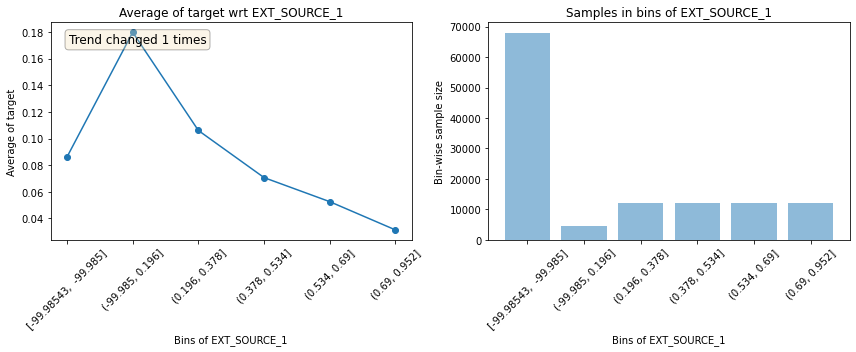

                                           Test data plots                                            


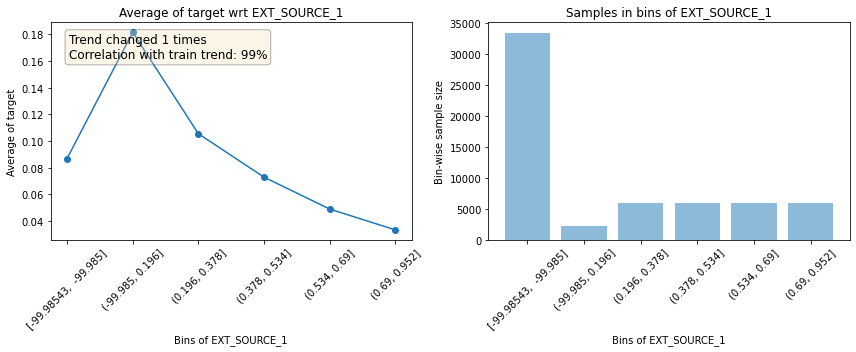

--------------------------------------------------------------------------------------------------------------




In [12]:
get_univariate_plots(data=data_train, target_col='target', features_list=["EXT_SOURCE_1"], data_test=data_test)

                                         Plots for DAYS_BIRTH                                         


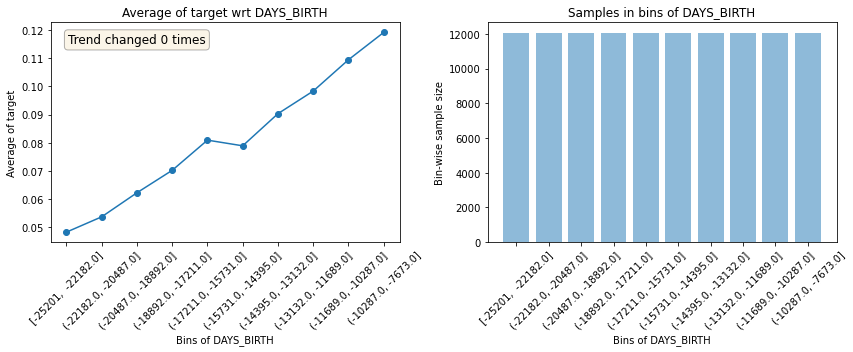

--------------------------------------------------------------------------------------------------------------


                                        Plots for EXT_SOURCE_1                                        


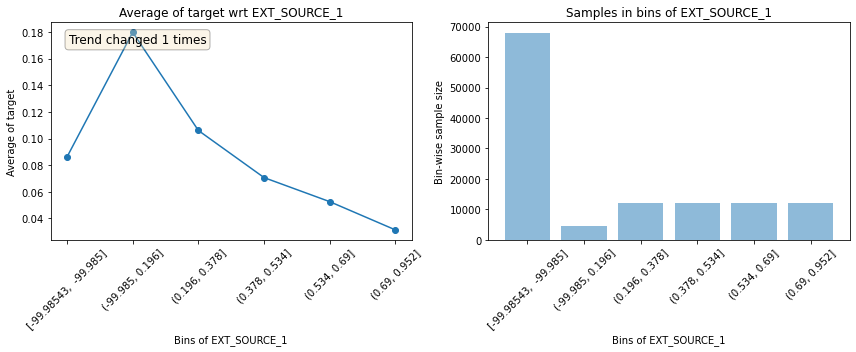

--------------------------------------------------------------------------------------------------------------




In [13]:
get_univariate_plots(data=data_train, target_col='target', features_list=["DAYS_BIRTH", "EXT_SOURCE_1"])

                                        Plots for CNT_CHILDREN                                        
                                           Train data plots                                           


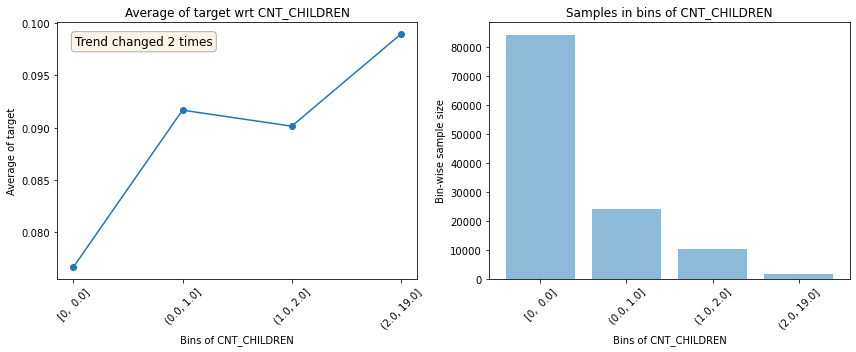

                                           Test data plots                                            


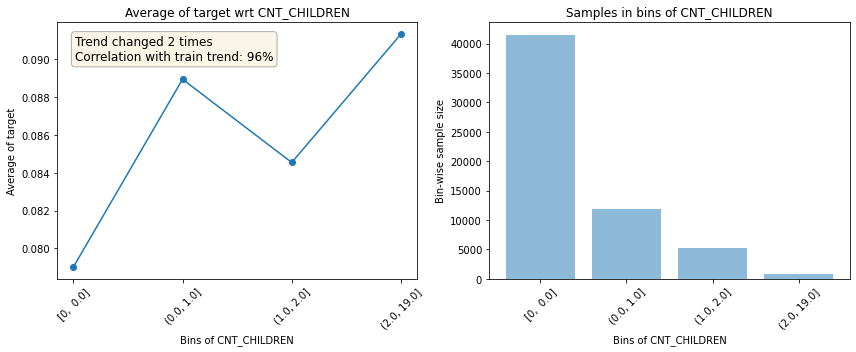

--------------------------------------------------------------------------------------------------------------




In [14]:
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[0:1], data_test=data_test)

                                        Plots for CNT_CHILDREN                                        
                                           Train data plots                                           


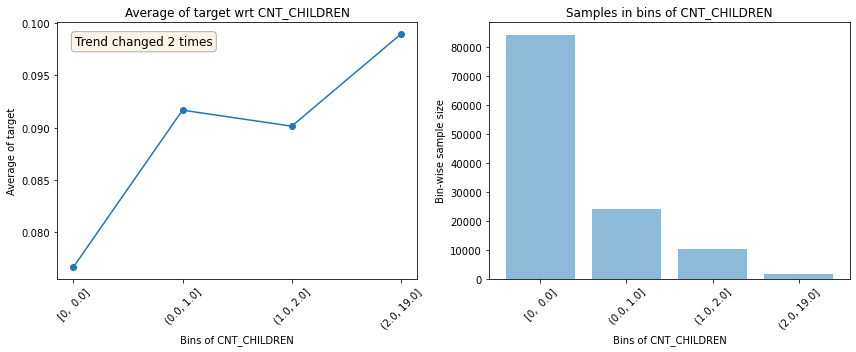

                                           Test data plots                                            


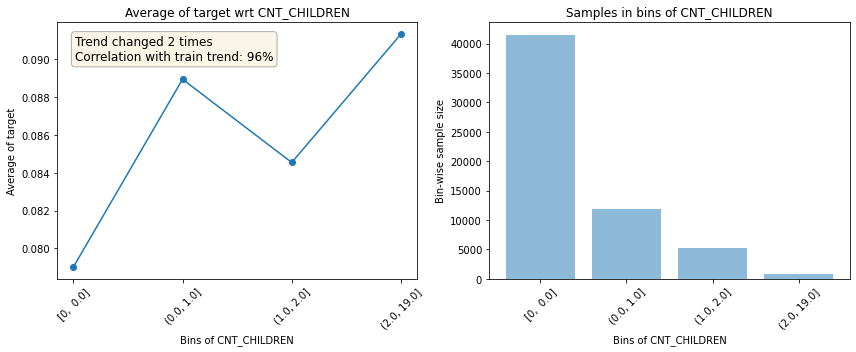

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


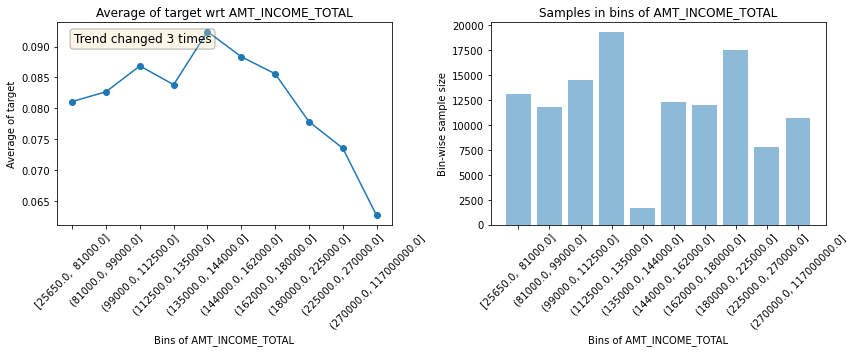

                                           Test data plots                                            


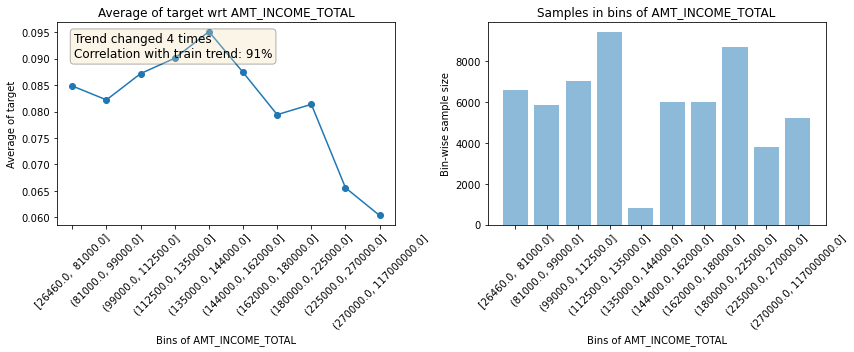

--------------------------------------------------------------------------------------------------------------


                                         Plots for AMT_CREDIT                                         
                                           Train data plots                                           


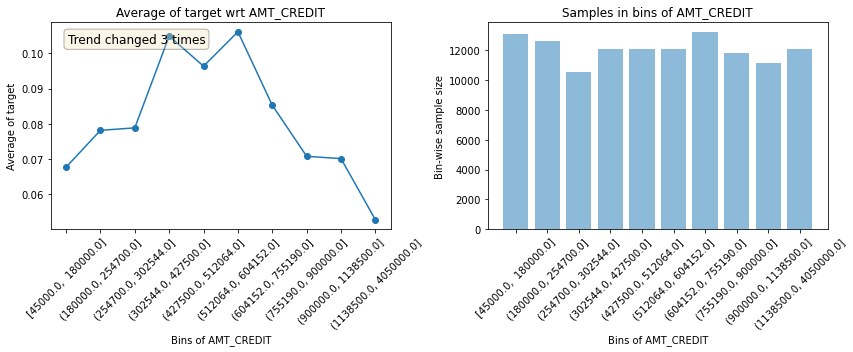

                                           Test data plots                                            


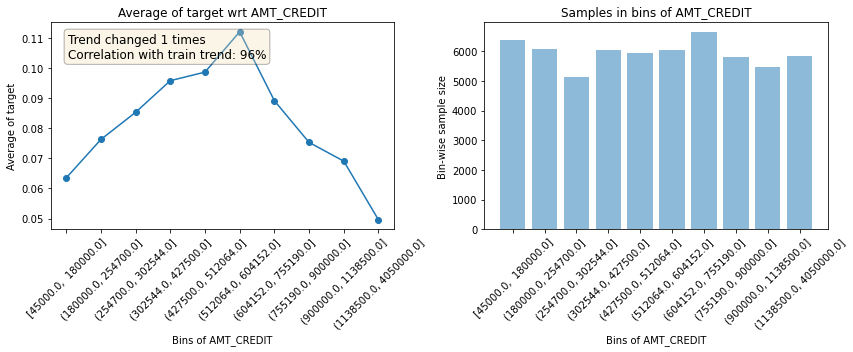

--------------------------------------------------------------------------------------------------------------


                                        Plots for AMT_ANNUITY                                         
                                           Train data plots                                           


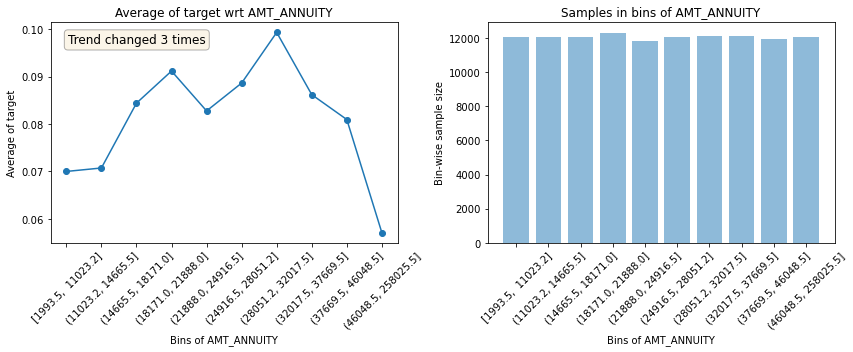

                                           Test data plots                                            


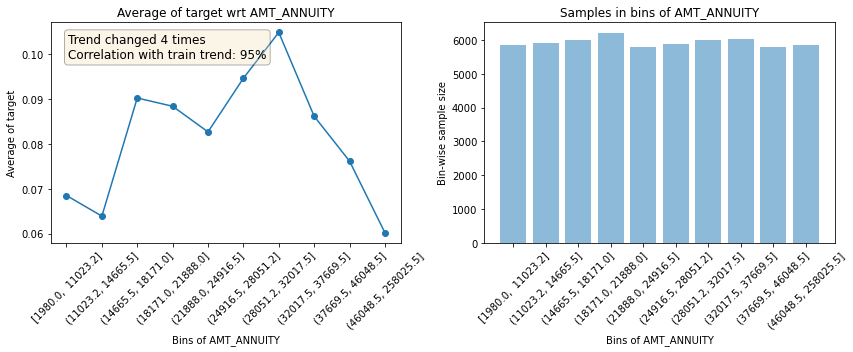

--------------------------------------------------------------------------------------------------------------


                                      Plots for AMT_GOODS_PRICE                                       
                                           Train data plots                                           


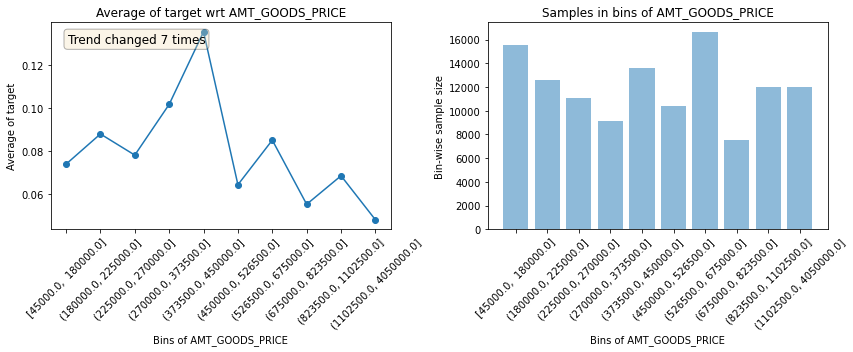

                                           Test data plots                                            


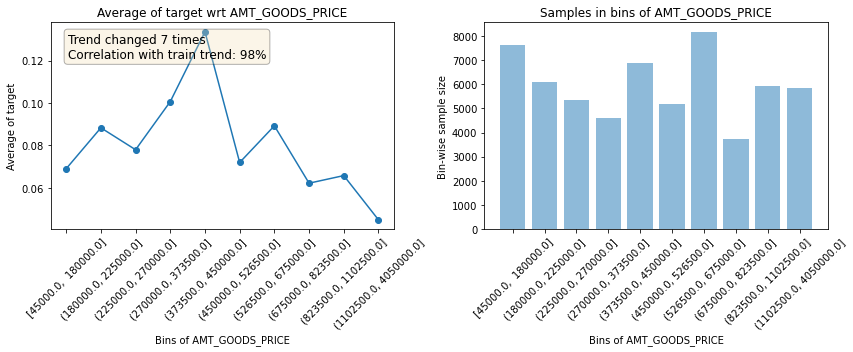

--------------------------------------------------------------------------------------------------------------


                                 Plots for REGION_POPULATION_RELATIVE                                 
                                           Train data plots                                           


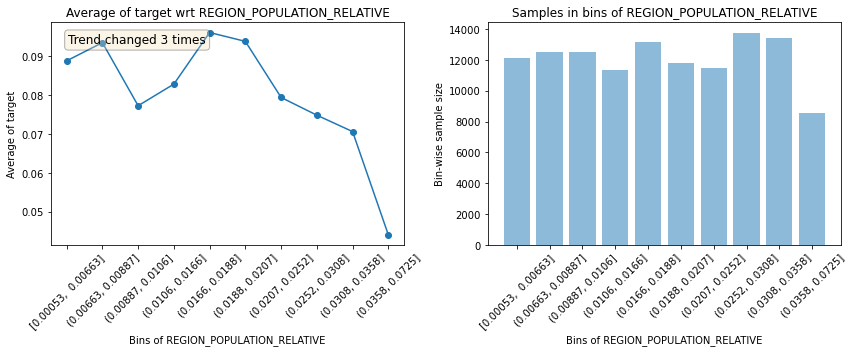

                                           Test data plots                                            


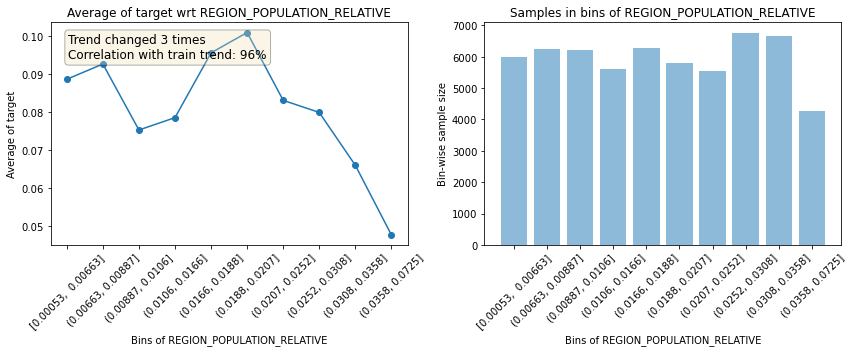

--------------------------------------------------------------------------------------------------------------


                                         Plots for DAYS_BIRTH                                         
                                           Train data plots                                           


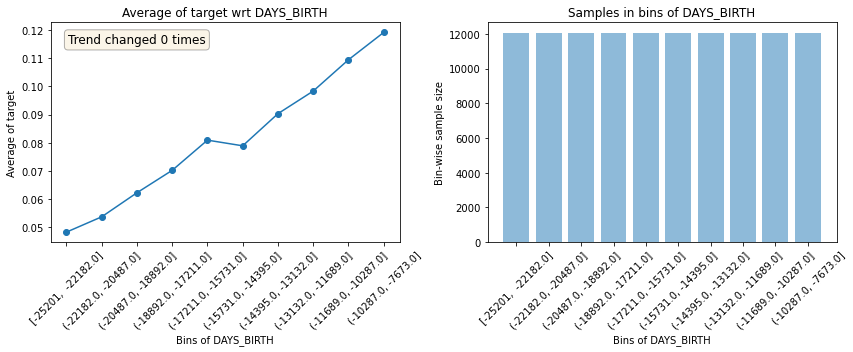

                                           Test data plots                                            


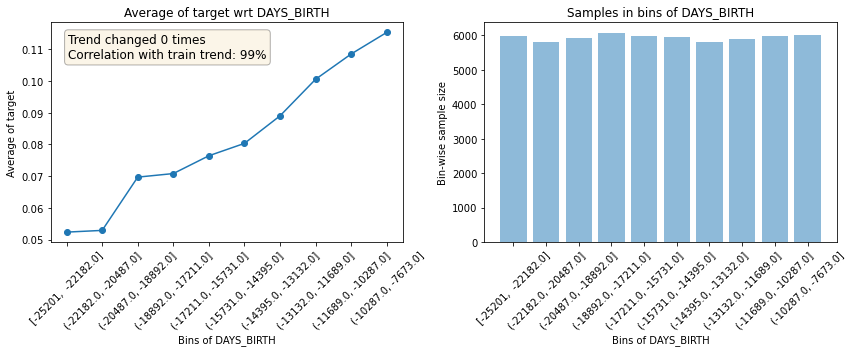

--------------------------------------------------------------------------------------------------------------


                                       Plots for DAYS_EMPLOYED                                        
                                           Train data plots                                           


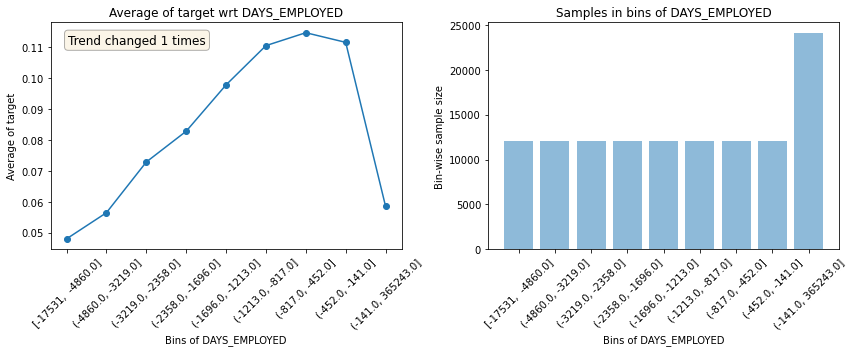

                                           Test data plots                                            


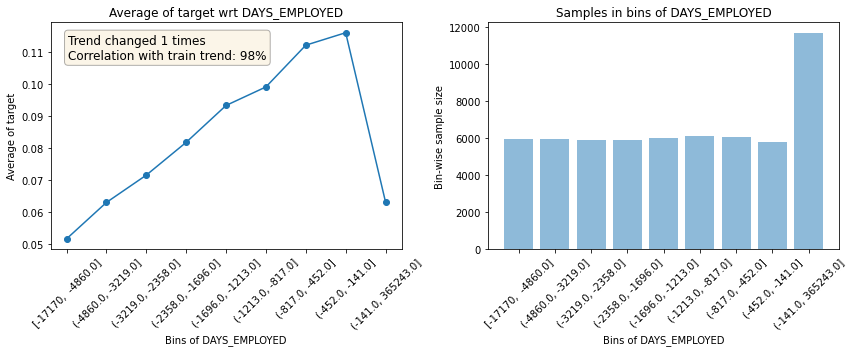

--------------------------------------------------------------------------------------------------------------


                                     Plots for DAYS_REGISTRATION                                      
                                           Train data plots                                           


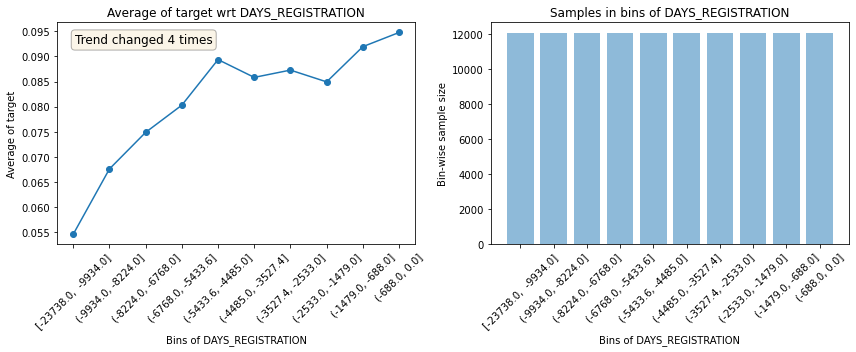

                                           Test data plots                                            


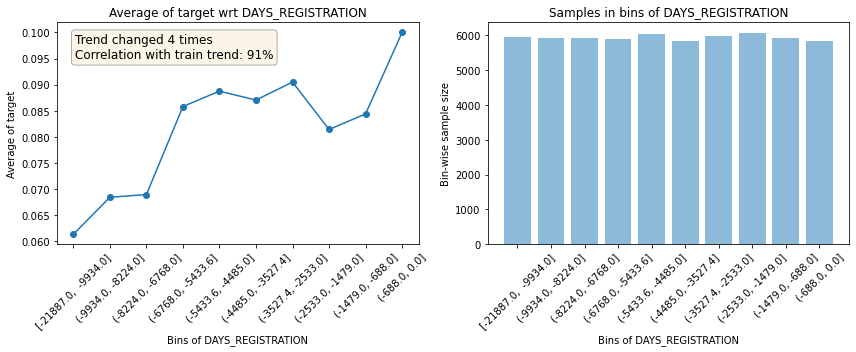

--------------------------------------------------------------------------------------------------------------


                                      Plots for DAYS_ID_PUBLISH                                       
                                           Train data plots                                           


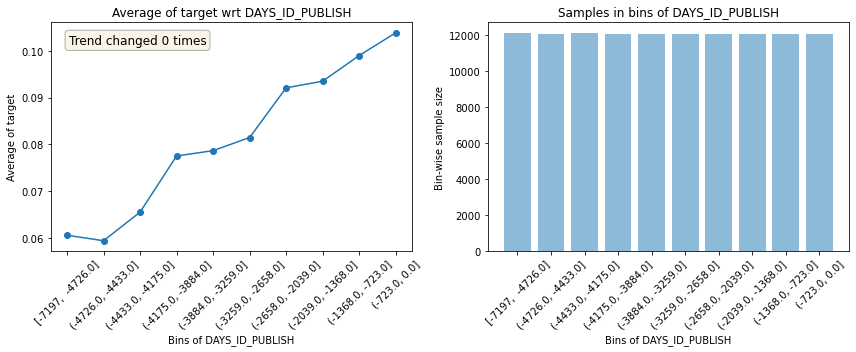

                                           Test data plots                                            


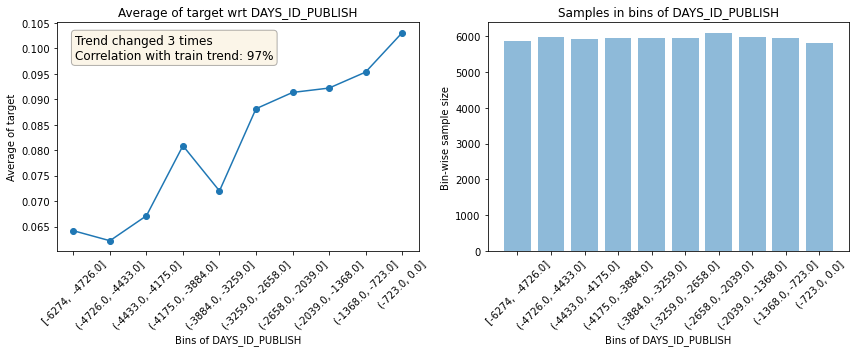

--------------------------------------------------------------------------------------------------------------


                                        Plots for OWN_CAR_AGE                                         
                                           Train data plots                                           


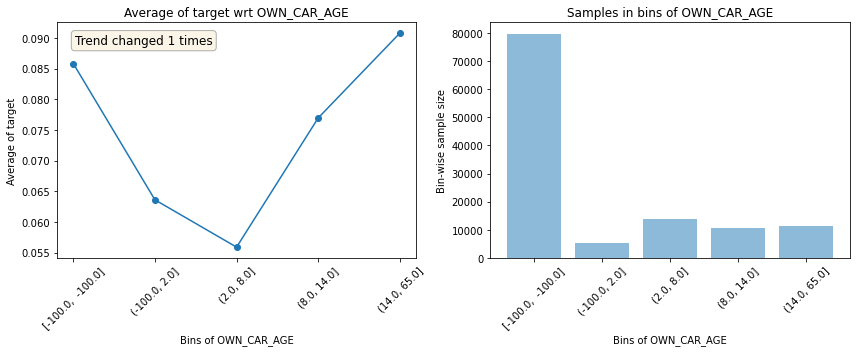

                                           Test data plots                                            


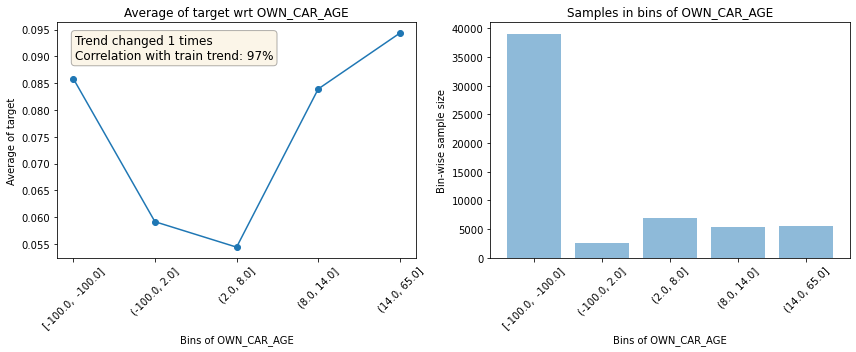

--------------------------------------------------------------------------------------------------------------


                                         Plots for FLAG_MOBIL                                         
Only one bin created for FLAG_MOBIL. Correlation can't be calculated
                                           Train data plots                                           


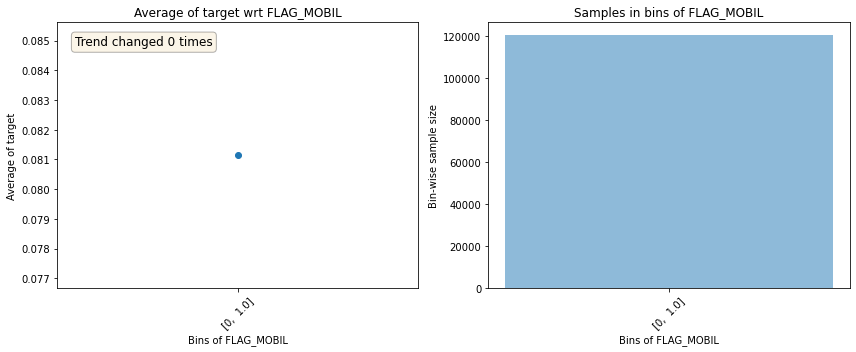

                                           Test data plots                                            


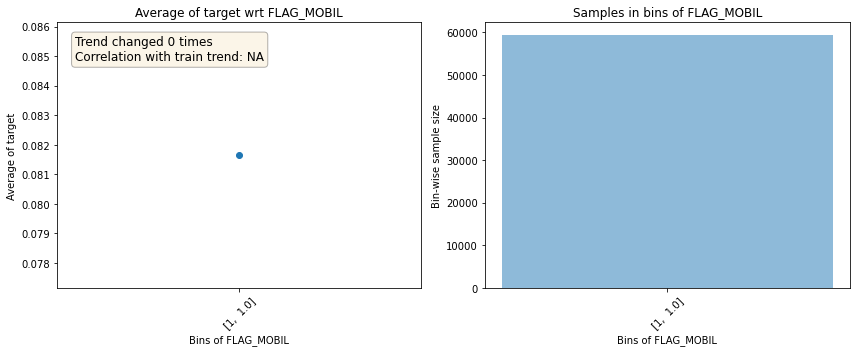

--------------------------------------------------------------------------------------------------------------


                                       Plots for FLAG_EMP_PHONE                                       
                                           Train data plots                                           


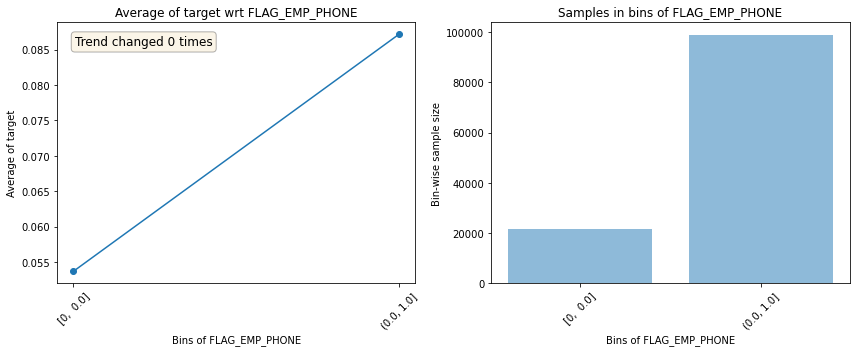

                                           Test data plots                                            


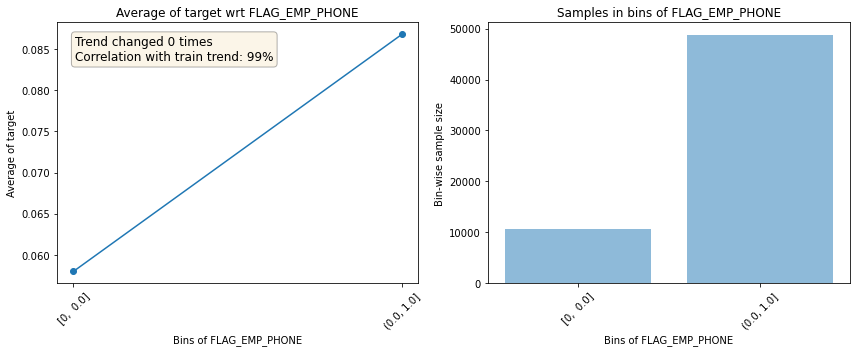

--------------------------------------------------------------------------------------------------------------


                                      Plots for FLAG_WORK_PHONE                                       
                                           Train data plots                                           


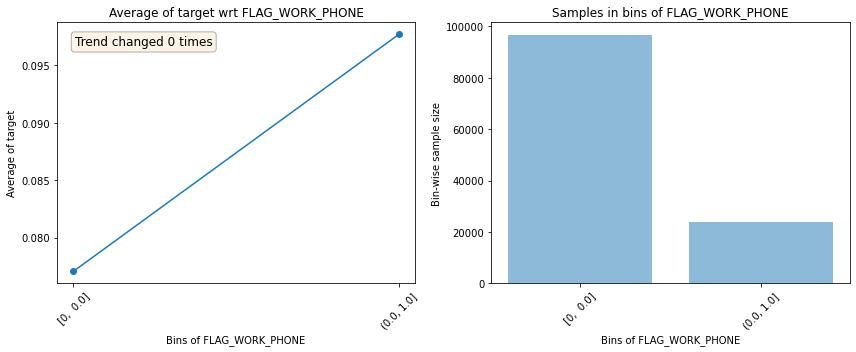

                                           Test data plots                                            


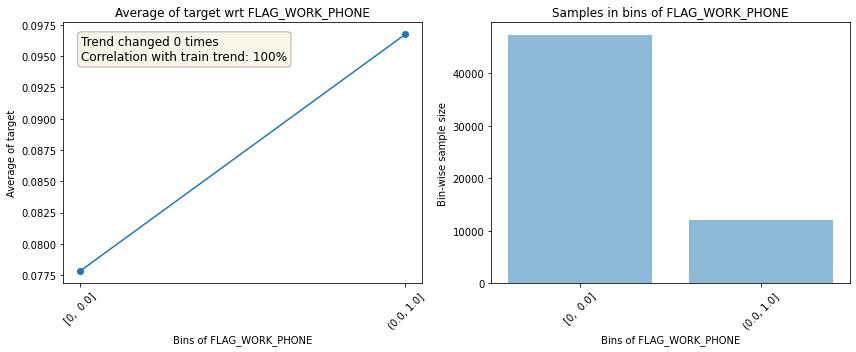

--------------------------------------------------------------------------------------------------------------


                                      Plots for FLAG_CONT_MOBILE                                      
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
                                           Train data plots                                           


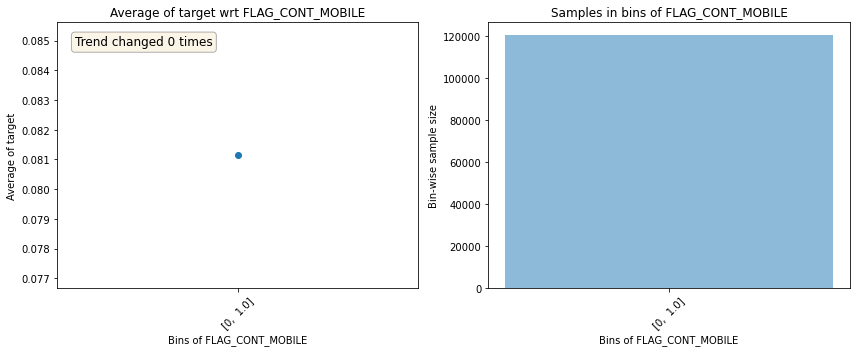

                                           Test data plots                                            


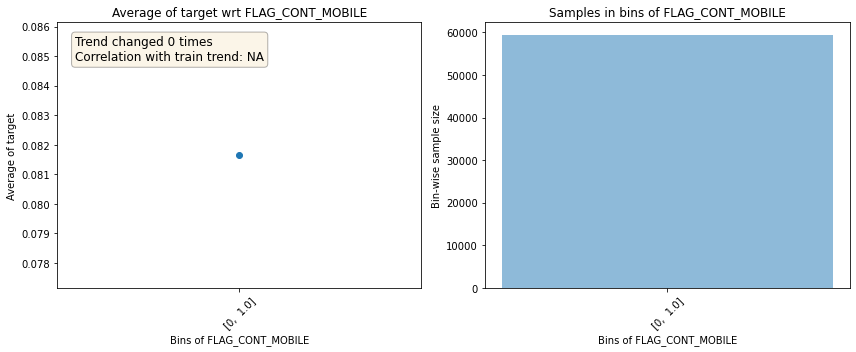

--------------------------------------------------------------------------------------------------------------


                                         Plots for FLAG_PHONE                                         
                                           Train data plots                                           


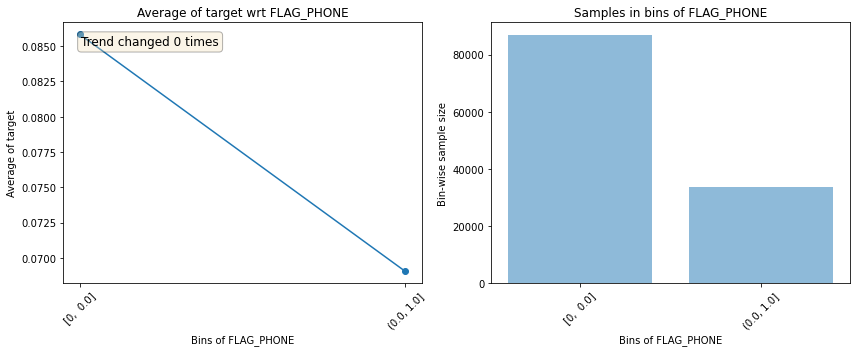

                                           Test data plots                                            


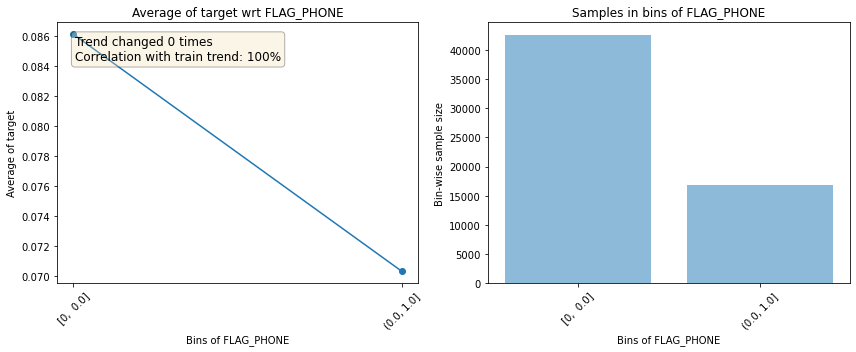

--------------------------------------------------------------------------------------------------------------


                                         Plots for FLAG_EMAIL                                         
                                           Train data plots                                           


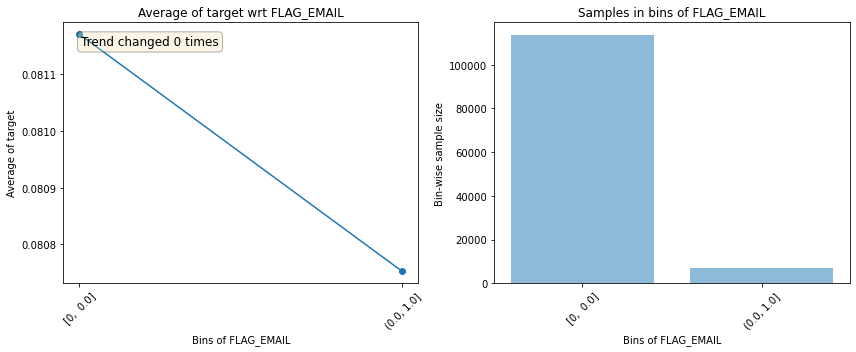

                                           Test data plots                                            


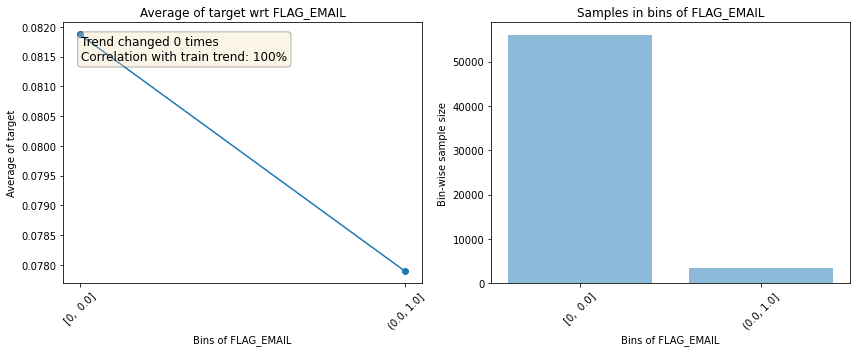

--------------------------------------------------------------------------------------------------------------


                                      Plots for CNT_FAM_MEMBERS                                       
                                           Train data plots                                           


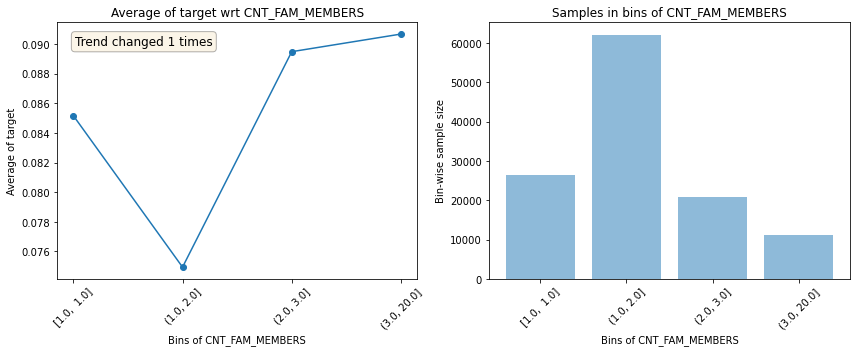

                                           Test data plots                                            


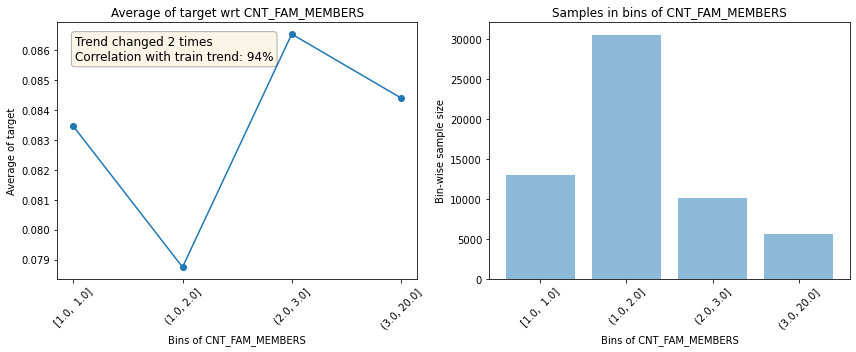

--------------------------------------------------------------------------------------------------------------


                                    Plots for REGION_RATING_CLIENT                                    
                                           Train data plots                                           


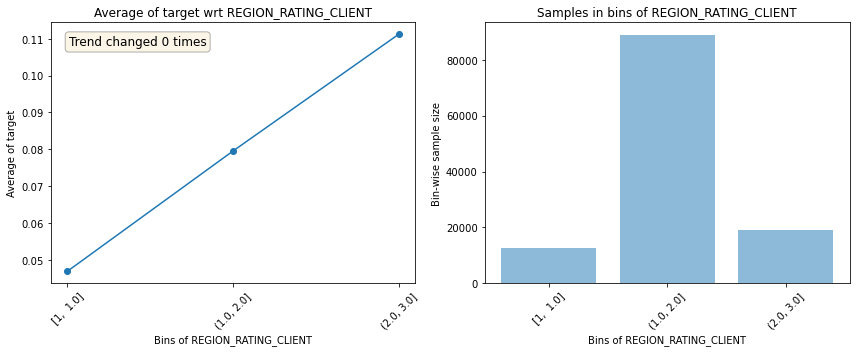

                                           Test data plots                                            


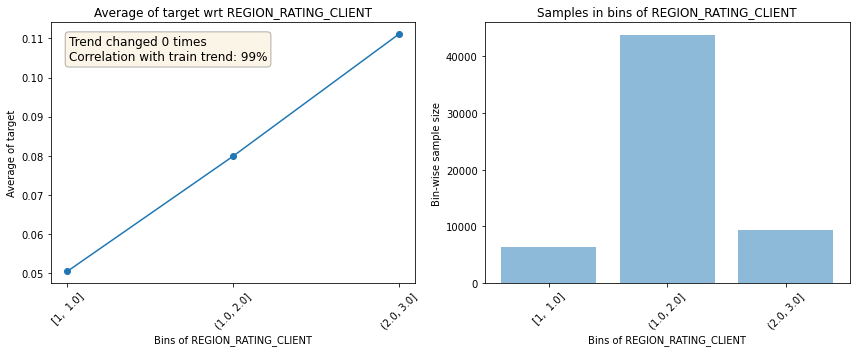

--------------------------------------------------------------------------------------------------------------


                                Plots for REGION_RATING_CLIENT_W_CITY                                 
                                           Train data plots                                           


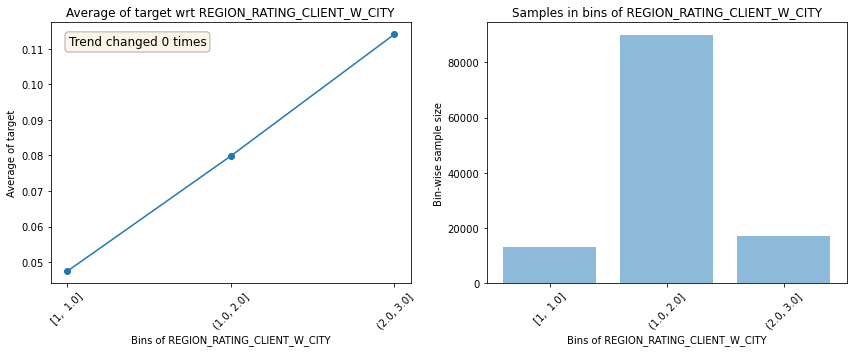

                                           Test data plots                                            


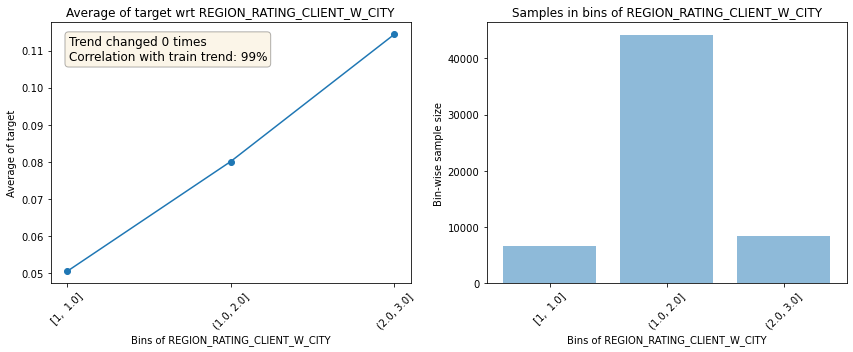

--------------------------------------------------------------------------------------------------------------


                                  Plots for HOUR_APPR_PROCESS_START                                   
                                           Train data plots                                           


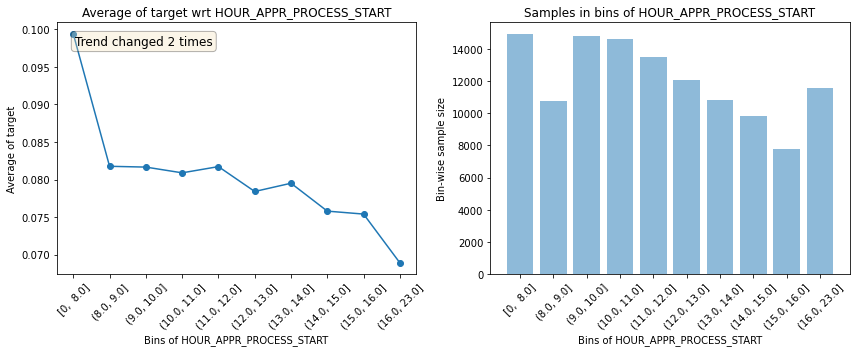

                                           Test data plots                                            


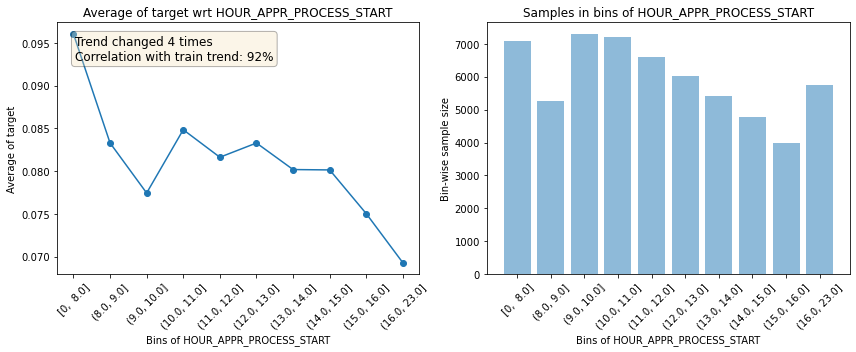

--------------------------------------------------------------------------------------------------------------




In [15]:
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[0:21], data_test=data_test)

                                 Plots for AMT_REQ_CREDIT_BUREAU_WEEK                                 
                                           Train data plots                                           


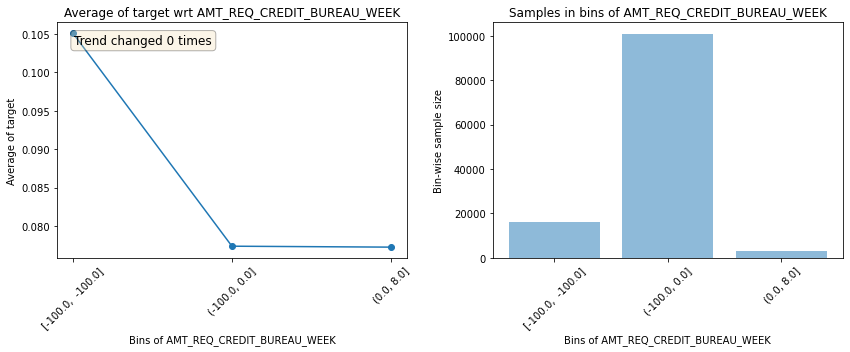

                                           Test data plots                                            


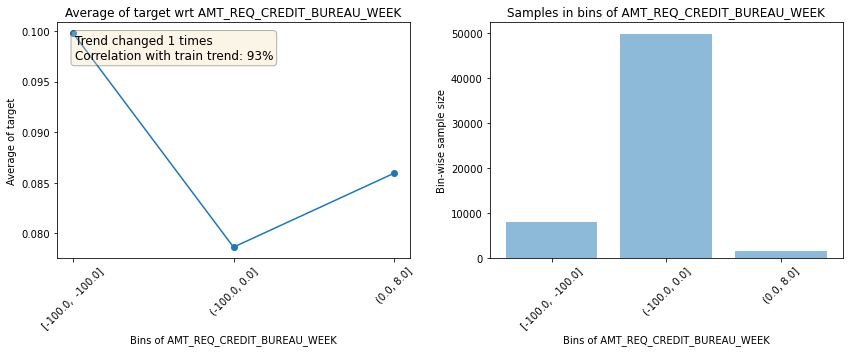

--------------------------------------------------------------------------------------------------------------


                                 Plots for AMT_REQ_CREDIT_BUREAU_MON                                  
                                           Train data plots                                           


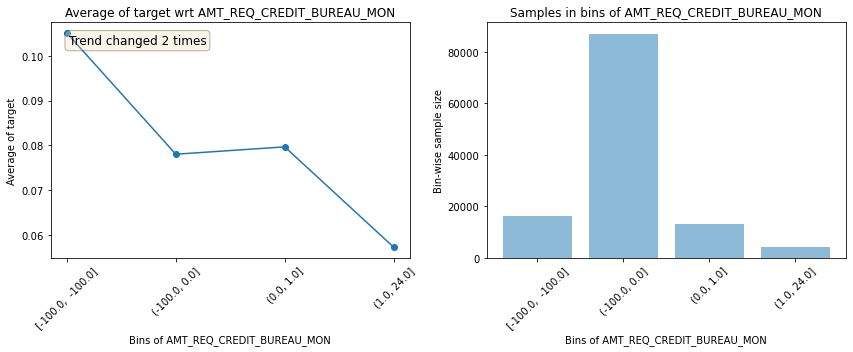

                                           Test data plots                                            


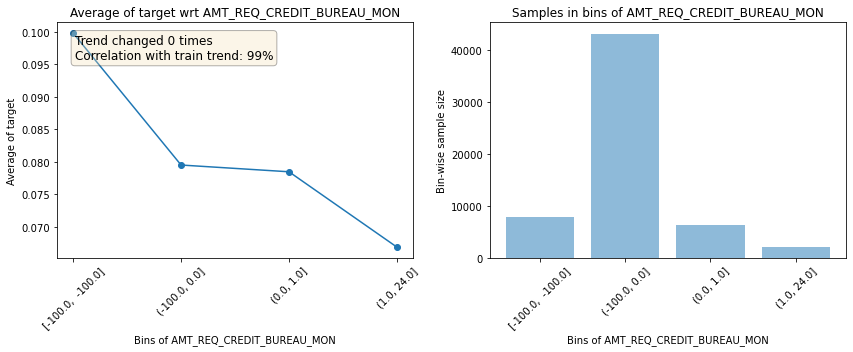

--------------------------------------------------------------------------------------------------------------


                                 Plots for AMT_REQ_CREDIT_BUREAU_QRT                                  
                                           Train data plots                                           


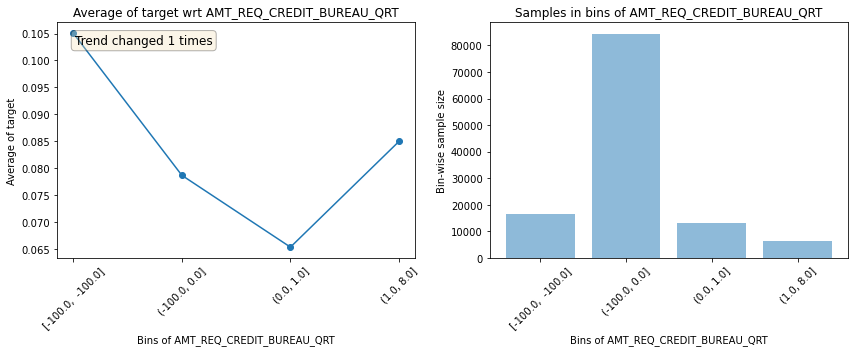

                                           Test data plots                                            


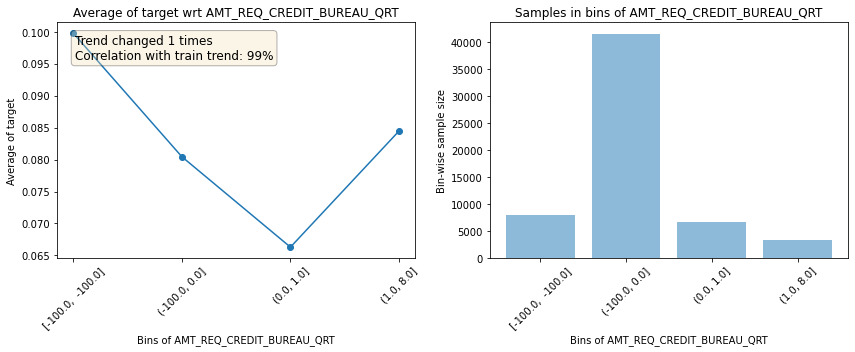

--------------------------------------------------------------------------------------------------------------


                                 Plots for AMT_REQ_CREDIT_BUREAU_YEAR                                 
                                           Train data plots                                           


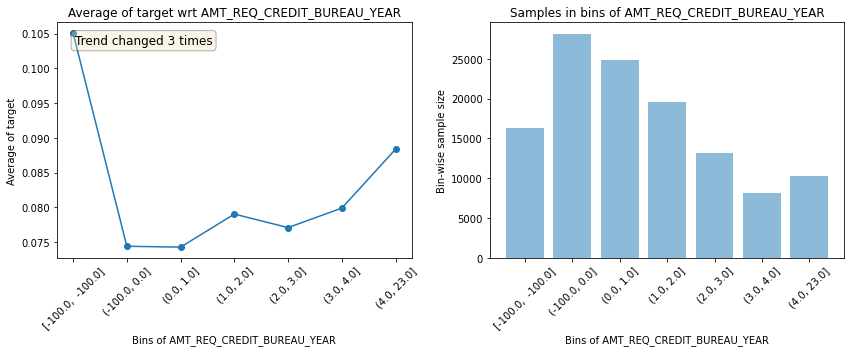

                                           Test data plots                                            


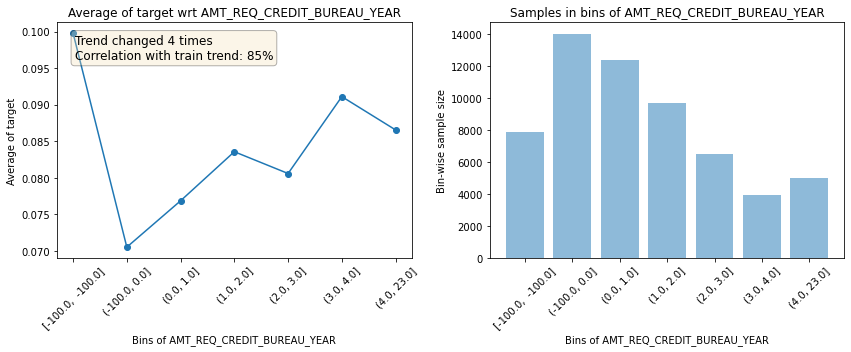

--------------------------------------------------------------------------------------------------------------




In [16]:
get_univariate_plots(data=data_train, target_col='target', features_list=data_train.columns[100:104], data_test=data_test)

In [17]:
stats = get_trend_stats(data=data_train, target_col='target', data_test=data_test)

Only one bin created for FLAG_MOBIL. Correlation can't be calculated
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
Only one bin created for FLAG_DOCUMENT_12. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_Cash loans. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_nan. Correlation can't be calculated
Only one bin created for CODE_GENDER_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_CAR_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_REALTY_nan. Correlation can't be calculated
Only one bin created for NAME_INCOME_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_EDUCATION_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_FAMILY_STATUS_nan. Correlation can't be calculated
Only one bin created for NAME_HOUSING_TYPE_nan. Correlation can't be calculated
Only one bin created for WEEKDAY_APPR_PROCESS_START_nan. Correl

In [18]:
stats

Feature  Trend_changes  Trend_changes_test  \
0                 CNT_CHILDREN              2                   2   
1             AMT_INCOME_TOTAL              3                   4   
2                   AMT_CREDIT              3                   1   
3                  AMT_ANNUITY              3                   4   
4              AMT_GOODS_PRICE              7                   7   
..                         ...            ...                 ...   
193  WALLSMATERIAL_MODE_Wooden              0                   0   
194     WALLSMATERIAL_MODE_nan              0                   0   
195     EMERGENCYSTATE_MODE_No              0                   0   
196    EMERGENCYSTATE_MODE_Yes              0                   0   
197    EMERGENCYSTATE_MODE_nan              0                   0   

     Trend_correlation  
0             0.963467  
1             0.918246  
2             0.962070  
3             0.951946  
4             0.985357  
..                 ...  
193           1.000000  
194           1.000000  
195           1.000000  
196           1.000000  
197           1.000000  

[198 rows x 4 columns]

In [19]:
stats = get_trend_stats(data=data_train, target_col='target', features_list=["AMT_REQ_CREDIT_BUREAU_YEAR"], data_test=data_test)

Returning stats for all numeric features


In [20]:
stats

Feature  Trend_changes  Trend_changes_test  \
0  AMT_REQ_CREDIT_BUREAU_YEAR              3                   4   

   Trend_correlation  
0           0.855457

                                      Plots for AMT_INCOME_TOTAL                                      
                                           Train data plots                                           


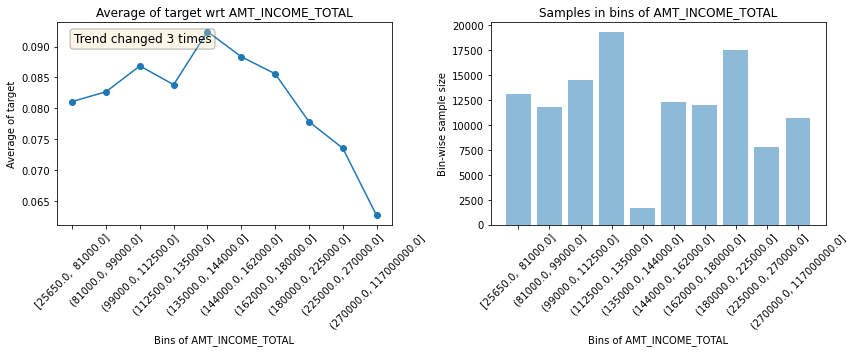

                                           Test data plots                                            


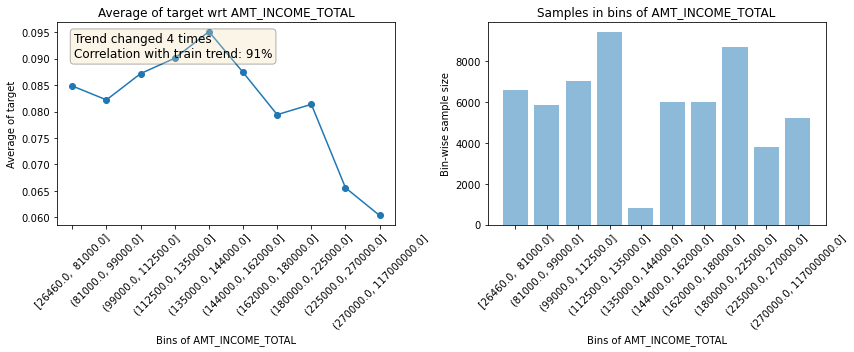

--------------------------------------------------------------------------------------------------------------




In [21]:
grouped_train, grouped_test = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL',data_test=data_test)

In [22]:
grouped_train

AMT_INCOME_TOTAL  Samples_in_bin  target_mean  AMT_INCOME_TOTAL_mean
0      [25650.0,  81000.0]           13068     0.081114           66256.229879
1       (81000.0, 99000.0]           11803     0.082691           91088.005463
2      (99000.0, 112500.0]           14493     0.086870          111334.163517
3     (112500.0, 135000.0]           19298     0.083843          131856.657146
4     (135000.0, 144000.0]            1688     0.092417          142948.408383
5     (144000.0, 162000.0]           12246     0.088355          157136.273143
6     (162000.0, 180000.0]           11985     0.085607          178025.018523
7     (180000.0, 225000.0]           17531     0.077862          212588.833776
8     (225000.0, 270000.0]            7815     0.073576          259488.081075
9  (270000.0, 117000000.0]           10670     0.062699          401281.864920

In [24]:
grouped_test

AMT_INCOME_TOTAL  Samples_in_bin  target_mean  AMT_INCOME_TOTAL_mean
0      [26460.0,  81000.0]            6589     0.084838           65981.238246
1       (81000.0, 99000.0]            5863     0.082210           91118.232193
2      (99000.0, 112500.0]            7031     0.087185          111338.774712
3     (112500.0, 135000.0]            9413     0.090088          131745.375741
4     (135000.0, 144000.0]             799     0.095119          142835.434919
5     (144000.0, 162000.0]            6017     0.087419          157030.813861
6     (162000.0, 180000.0]            5981     0.079418          178126.982779
7     (180000.0, 225000.0]            8676     0.081374          212737.481043
8     (225000.0, 270000.0]            3811     0.065600          259405.923117
9  (270000.0, 117000000.0]            5219     0.060356          386652.392400

                                      Plots for AMT_INCOME_TOTAL                                      


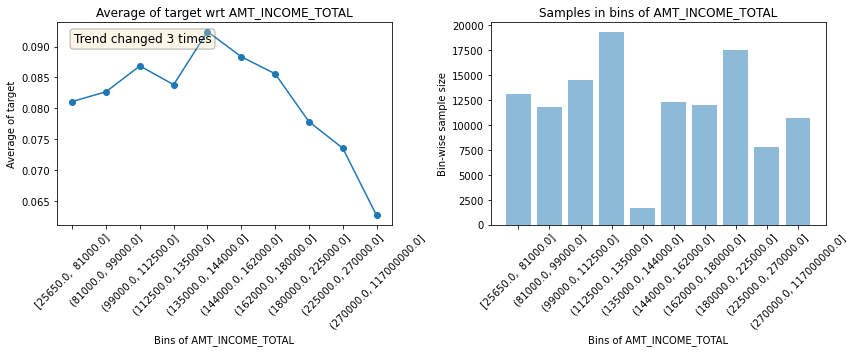

--------------------------------------------------------------------------------------------------------------




In [25]:
grouped_train = univariate_plotter(data=data_train, target_col='target', feature='AMT_INCOME_TOTAL')

In [26]:
grouped_train

AMT_INCOME_TOTAL  Samples_in_bin  target_mean  AMT_INCOME_TOTAL_mean
0      [25650.0,  81000.0]           13068     0.081114           66256.229879
1       (81000.0, 99000.0]           11803     0.082691           91088.005463
2      (99000.0, 112500.0]           14493     0.086870          111334.163517
3     (112500.0, 135000.0]           19298     0.083843          131856.657146
4     (135000.0, 144000.0]            1688     0.092417          142948.408383
5     (144000.0, 162000.0]           12246     0.088355          157136.273143
6     (162000.0, 180000.0]           11985     0.085607          178025.018523
7     (180000.0, 225000.0]           17531     0.077862          212588.833776
8     (225000.0, 270000.0]            7815     0.073576          259488.081075
9  (270000.0, 117000000.0]           10670     0.062699          401281.864920

In [27]:
stats

Feature  Trend_changes  Trend_changes_test  \
0  AMT_REQ_CREDIT_BUREAU_YEAR              3                   4   

   Trend_correlation  
0           0.855457

                                         Plots for DAYS_BIRTH                                         


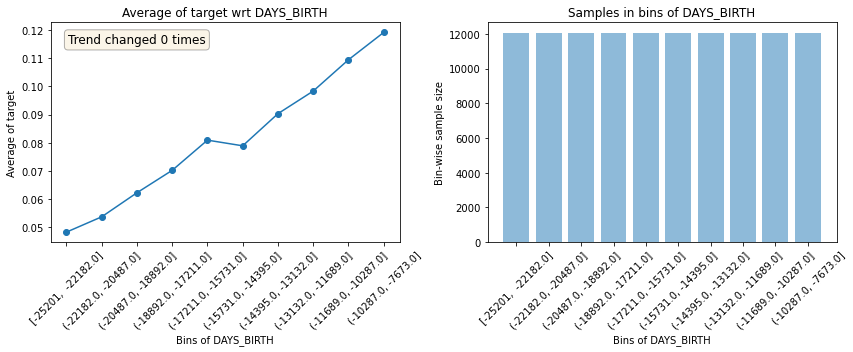

--------------------------------------------------------------------------------------------------------------




In [28]:
get_univariate_plots(data=data_train, target_col='target', features_list=['DAYS_BIRTH'], bins=10)

                                         Plots for AMT_CREDIT                                         


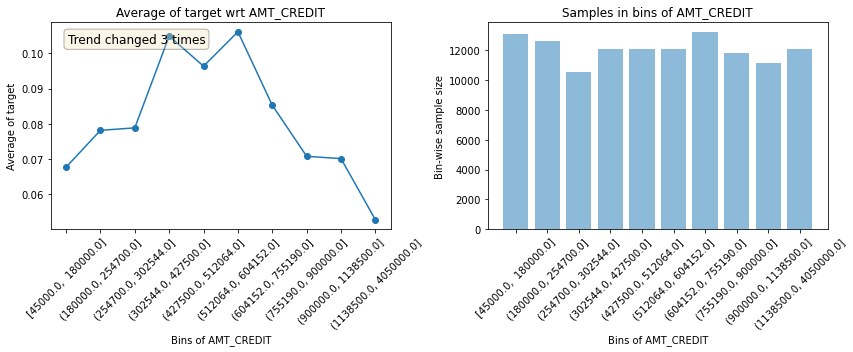

--------------------------------------------------------------------------------------------------------------




In [29]:
get_univariate_plots(data=data_train, target_col='target', features_list=['AMT_CREDIT'], bins=10)

In [56]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as pyplot

In [1]:
X = data_train[["DAYS_BIRTH", "EXT_SOURCE_1"]]
y = data_train['target']
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

NameError: name 'data_train' is not defined

In [30]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [31]:
dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[21:58:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71981	test-auc:0.70244
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72588	test-auc:0.70880
[2]	train-auc:0.72832	test-auc:0.71169
[3]	train-auc:0.73031	test-auc:0.71348
[4]	train-auc:0.73059	test-auc:0.71354
[5]	train-auc:0.73174	test-auc:0.71476
[6]	train-auc:0.73364	test-auc:0.71602
[7]	train-auc:0.73411	test-auc:0.71694
[8]	train-auc:0.73480	test-auc:0.71799
[9]	train-auc:0.73536	test-auc:0.71870
[10]	train-auc:0.73583	test-auc:0.71954
[11]	train-auc:0.73632	test-auc:0.71988
[12]	

train-auc:0.78578	test-auc:0.75184

In [32]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns], missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_all_feats = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET': y_TEST_pred})
submission_all_feats.to_csv('submission_all_feats_1.csv', index=False)

In [33]:
stats = get_trend_stats(data=data_train, target_col='target', data_test=data_test)

Only one bin created for FLAG_MOBIL. Correlation can't be calculated
Only one bin created for FLAG_CONT_MOBILE. Correlation can't be calculated
Only one bin created for FLAG_DOCUMENT_12. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_Cash loans. Correlation can't be calculated
Only one bin created for NAME_CONTRACT_TYPE_nan. Correlation can't be calculated
Only one bin created for CODE_GENDER_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_CAR_nan. Correlation can't be calculated
Only one bin created for FLAG_OWN_REALTY_nan. Correlation can't be calculated
Only one bin created for NAME_INCOME_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_EDUCATION_TYPE_nan. Correlation can't be calculated
Only one bin created for NAME_FAMILY_STATUS_nan. Correlation can't be calculated
Only one bin created for NAME_HOUSING_TYPE_nan. Correlation can't be calculated
Only one bin created for WEEKDAY_APPR_PROCESS_START_nan. Correl

In [34]:
def get_imp_df(xgb_model):
    imp = pd.DataFrame(np.asarray(list(xgb_model.get_fscore().keys())))
    imp.columns = ["Feature"]
    imp["importance"] = np.asarray(list(xgb_model.get_fscore().values()))
    imp = imp.sort_values(by=["importance"], ascending=False)
    imp = imp.reset_index(drop=True)
    return imp

In [35]:
importance_df = get_imp_df(xgb_model)
stats = pd.merge(stats, importance_df, how='left', on='Feature')
stats['importance'] = stats['importance'].fillna(0)

Dropping features with trend corr < 0.95

In [36]:
noisy = list(stats[stats['Trend_correlation']<0.95]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[21:59:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71961	test-auc:0.70329
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72527	test-auc:0.70903
[2]	train-auc:0.72775	test-auc:0.71188
[3]	train-auc:0.72950	test-auc:0.71342
[4]	train-auc:0.72973	test-auc:0.71415
[5]	train-auc:0.73115	test-auc:0.71559
[6]	train-auc:0.73336	test-auc:0.71696
[7]	train-auc:0.73323	test-auc:0.71696
[8]	train-auc:0.73437	test-auc:0.71876
[9]	train-auc:0.73478	test-auc:0.71903
[10]	train-auc:0.73533	test-auc:0.71986
[11]	train-auc:0.73561	test-auc:0.72015
[12]	

train-auc:0.78921	test-auc:0.75253

In [37]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95.to_csv('submission_95_1.csv', index=False)

Dropping features with trend corr < 0.93

In [38]:
noisy = list(stats[stats['Trend_correlation']<0.93]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[22:01:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71976	test-auc:0.70257
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72560	test-auc:0.70861
[2]	train-auc:0.72800	test-auc:0.71165
[3]	train-auc:0.72983	test-auc:0.71309
[4]	train-auc:0.73005	test-auc:0.71346
[5]	train-auc:0.73144	test-auc:0.71474
[6]	train-auc:0.73339	test-auc:0.71630
[7]	train-auc:0.73347	test-auc:0.71639
[8]	train-auc:0.73442	test-auc:0.71816
[9]	train-auc:0.73504	test-auc:0.71876
[10]	train-auc:0.73553	test-auc:0.71958
[11]	train-auc:0.73560	test-auc:0.71944
[12]	

train-auc:0.78349	test-auc:0.75171

In [39]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_93 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_93.to_csv('submission_93_1.csv', index=False)

Dropping features with trend corr < 0.90

In [40]:
noisy = list(stats[stats['Trend_correlation']<0.90]['Feature'])
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':8 }
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[22:02:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71976	test-auc:0.70257
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72560	test-auc:0.70861
[2]	train-auc:0.72824	test-auc:0.71163
[3]	train-auc:0.72995	test-auc:0.71308
[4]	train-auc:0.73019	test-auc:0.71346
[5]	train-auc:0.73155	test-auc:0.71474
[6]	train-auc:0.73346	test-auc:0.71628
[7]	train-auc:0.73350	test-auc:0.71613
[8]	train-auc:0.73448	test-auc:0.71795
[9]	train-auc:0.73510	test-auc:0.71858
[10]	train-auc:0.73585	test-auc:0.71910
[11]	train-auc:0.73623	test-auc:0.71940
[12]	

train-auc:0.78930	test-auc:0.75220

In [41]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_90 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_90.to_csv('submission_90_1.csv', index=False)

Dropping features with trend corr < 0.95 and feature importance < 40

In [42]:
noisy = list(stats[(stats['Trend_correlation']<0.95) & (stats['importance']<40)]['Feature']) # 
dtest = xgb.DMatrix(X_test.drop(noisy, axis=1), label=y_test, missing=np.nan)
dtrain = xgb.DMatrix(X_train.drop(noisy, axis=1), label=y_train, missing=np.nan)

params = {'max_depth':8, 'learning_rate':0.1, 'silent':0, 'objective':'binary:logistic', 'min_child_weight':600,
            'eval_metric' : 'auc', 'nthread':16}
xgb_model = xgb.train(params, dtrain, 400, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=25)

[22:03:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.71961	test-auc:0.70329
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 25 rounds.
[1]	train-auc:0.72527	test-auc:0.70903
[2]	train-auc:0.72775	test-auc:0.71188
[3]	train-auc:0.72950	test-auc:0.71342
[4]	train-auc:0.72973	test-auc:0.71415
[5]	train-auc:0.73115	test-auc:0.71559
[6]	train-auc:0.73336	test-auc:0.71696
[7]	train-auc:0.73323	test-auc:0.71696
[8]	train-auc:0.73437	test-auc:0.71876
[9]	train-auc:0.73478	test-auc:0.71903
[10]	train-auc:0.73533	test-auc:0.71986
[11]	train-auc:0.73561	test-auc:0.72015
[12]	

In [43]:
xgb_model.best_iteration

399

train-auc:0.79283	test-auc:0.75304

In [44]:
dTEST = xgb.DMatrix(X_TEST[X_test.columns].drop(noisy, axis=1), missing=np.nan)
y_TEST_pred = xgb_model.predict(dTEST)
submission_95_40 = pd.DataFrame({'SK_ID_CURR' : TEST_users['SK_ID_CURR'], 'TARGET' : y_TEST_pred})
submission_95_40.to_csv('submission_95_40_1.csv', index=False)

without data processing: train-auc:0.78578 test-auc:0.75184

dropping features <0.95: train-auc:0.78921 test-auc:0.75253

dropping features <0.93: train-auc:0.78349 test-auc:0.75171

dropping features <0.90: train-auc:0.78930 test-auc:0.75220

dropping features <0.95 importance <40: train-auc:0.79283 test-auc:0.75304